In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Assuming the uploaded file is named exactly like this
df = pd.read_csv('CarPrice_Assignment.csv')

# Quick check
df.head()

# Display basic information
print(df.shape)
print(df.info())

# View first few rows
print(df.head())




Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv
(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    2

In [8]:
# Overview of columns, types, and missing values
df.info()

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# Drop 'car_ID' and extract brand name from 'CarName'
df.drop('car_ID', axis=1, inplace=True)
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df.drop('CarName', axis=1, inplace=True)

# Fix inconsistent brand names (optional)
df['CarBrand'] = df['CarBrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda': 'mazda'
})

# Check numeric vs categorical
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Categorical columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector': SVR()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)


In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))



Linear Regression:
R² Score: 0.9097012452093511
MSE: 7128546.783600071
MAE: 1763.5659861998276

Decision Tree:
R² Score: 0.9069070282892213
MSE: 7349133.502485098
MAE: 1782.5894390243902

Random Forest:
R² Score: 0.9584165239875437
MSE: 3282766.798576088
MAE: 1288.8250121951216

Gradient Boosting:
R² Score: 0.9241813472149517
MSE: 5985429.308530365
MAE: 1710.3363889664633

Support Vector:
R² Score: -0.10197961461333227
MSE: 86994701.70499203
MAE: 5707.132621274912


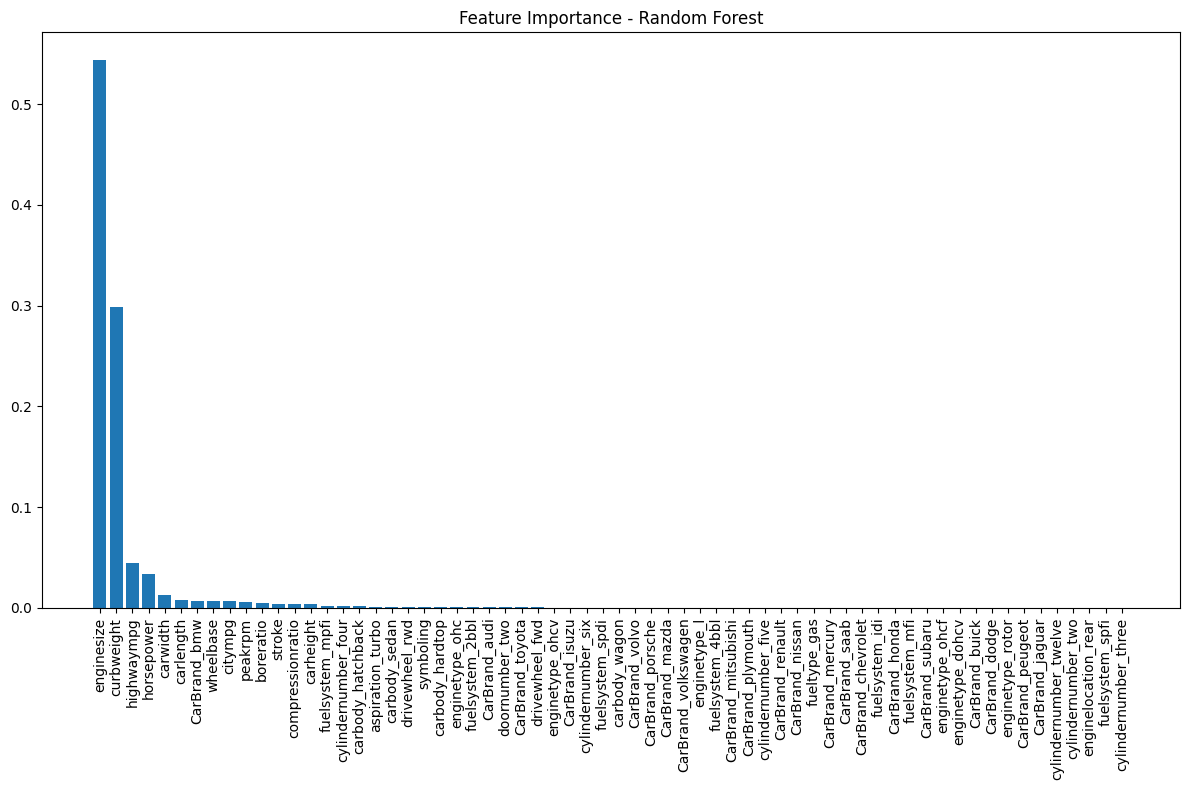

In [12]:
import matplotlib.pyplot as plt

# Random Forest feature importance
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on CV:", grid_search.best_score_)

# Evaluate best estimator on test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("\nEvaluation of Best RF Model:")
print("R² Score:", r2_score(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best R² Score on CV: 0.8878267727248895

Evaluation of Best RF Model:
R² Score: 0.9588695420562624
MSE: 3247003.7307003047
MAE: 1251.2671327913279
